In [71]:
from PIL import Image, ImageEnhance, ImageOps
from matplotlib import pyplot as plt
import numpy as np
import cv2

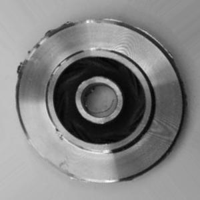

In [72]:
#read the image
im = Image.open("/content/drive/MyDrive/project/manufacturing/data/casting_data/train/def_front/cast_def_0_19.jpeg")
im_array = np.array(im)
resized_im = im.resize((200,200))
resized_im

## addition and subtraction

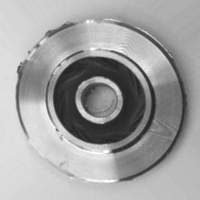

In [73]:
# addition(밝게)
im_add = np.clip(im_array.astype(np.int)+30,0,255)
Image.fromarray(im_add.astype(np.uint8)).resize((200,200))

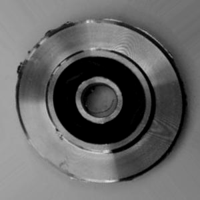

In [74]:
# subtraction(어둡게)
im_add = np.clip(im_array.astype(np.int)-30,0,255)
Image.fromarray(im_add.astype(np.uint8)).resize((200,200))

## contrast adjustment

이미지 대조 방법

In [75]:
# image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

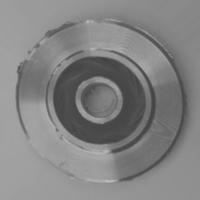

In [76]:
factor = 0.5 # decrease contrast
im_output = enhancer.enhance(factor)
im_output.resize((200,200))

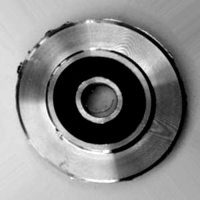

In [77]:
factor = 1.5 # decrease contrast
im_output2 = enhancer.enhance(factor)
im_output2.resize((200,200))

## Histogram equalization

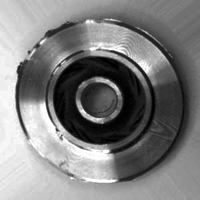

In [78]:
im_hist = ImageOps.equalize(im,mask=None)
im_hist.resize((200,200))

## gray scale

해당 이미지가 원래 흑백 이미지로 보여지고 채널 수가 많다는 생각이 들어 gray scale진행하면 좋겠다는 생각이 듦

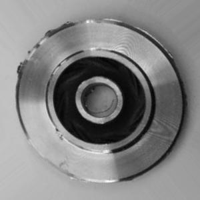

In [79]:
im_gray = resized_im.convert('L')
im_gray_array =  np.array(im_gray)
im_gray

In [80]:
resized_im_array = np.array(resized_im)

Text(0.5, 1.0, 'gray scaled image')

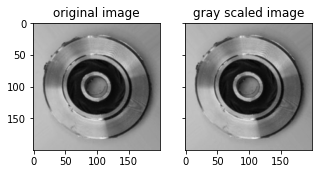

In [81]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((5, 5))

axes[0].imshow(resized_im_array)
axes[0].set_title("original image")

axes[1].imshow(im_gray_array, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("gray scaled image")

제조업 데이터 : https://buw.medium.com/%EB%94%A5-%EB%9F%AC%EB%8B%9D-%EA%B8%B0%EB%B0%98-%EC%BB%B4%ED%93%A8%ED%84%B0-%EB%B9%84%EC%A0%84%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-%EC%A0%9C%EC%A1%B0-%ED%92%88%EC%A7%88-%EA%B2%80%EC%82%AC-e205822bc181

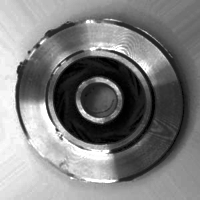

In [82]:
im_gray_hist = ImageOps.equalize(im_gray,mask=None)
im_gray_hist

# gradient : 윤곽선

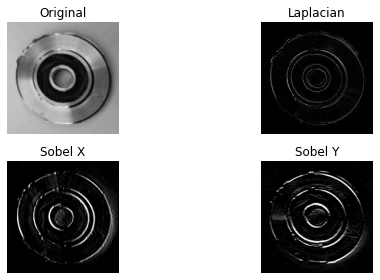

In [83]:
img = im_gray_array

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=(9, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

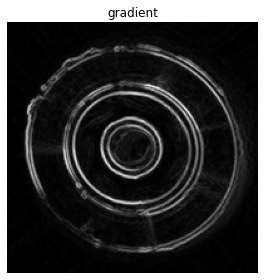

In [84]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)
plt.figure(figsize=(9, 4))
plt.title('gradient')
plt.axis("off")
plt.tight_layout()
plt.imshow(gradient, cmap='gray')
plt.show()

# 가우시안 블러

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_

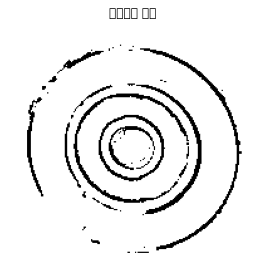

In [85]:
maxval = 255
thresh = 126

k = 15
C = 20

th = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

plt.figure(figsize=(9, 4))
plt.title('가우시안 블러')
plt.axis("off")
plt.tight_layout()
plt.imshow(th, cmap='gray')
plt.show()

생각하는 방향 : gray -> hist -> gradient적용 or 가우시안 블러 임계값 적용 사용

근데 빛에 의한 것도 처리할 수 있으면 좋을 것 같음

참고 : https://datascienceschool.net/03%20machine%20learning/03.02.02%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%95%84%ED%84%B0%EB%A7%81.html

<질문>

729는 왜 def?